**Mounting Google Drive**

This is an optional step. Google drive can also be mounted by clicking on the drive ikon under the files header to the left. 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Data Contents:**

The data contained the images which belonged to specific classes. The classes are:

1) Building

2) Forest 

3) Glacier

4) Mountain

5) Sea 

6) Street


The data is appended to the training and testing samples using for loop. 

In [33]:
# import libraries

import pandas as pd
import numpy as np
import zipfile
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten 

In [34]:
import os
import cv2
from google.colab.patches import cv2_imshow

The below patch of code is used to read a zip file without extracting the zip file in drive. 

In [4]:
import zipfile

with zipfile.ZipFile("/content/drive/My Drive/mixed_images.zip", "r") as f:
  f.extractall(' ')

View the sample image

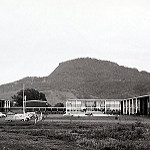

In [5]:
img = cv2.imread("/content/ /seg_train/seg_train/buildings/0.jpg")
cv2_imshow(img)

The below cells have a pattern where first we read a folder and then run a for loop over it to read the images and then store these images in x_train list. The labels will be appended to the y_train list.   

In [6]:
image_names = os.listdir("/content/ /seg_train/seg_train/buildings")

In [7]:
x_train = []
y_train = []
for i in range(len(image_names)):
  try:
    img = cv2.imread("/content/ /seg_train/seg_train/buildings/" + image_names[i])
    img = cv2.resize(img,(64,64))
    x_train.append(img)
    y_train.append(0)
  except:
    pass

In [8]:
len(x_train)

2191

In [9]:
image_names = os.listdir("/content/ /seg_train/seg_train/forest")

for i in range(len(image_names)):
  try:
    img = cv2.imread("/content/ /seg_train/seg_train/forest/" + image_names[i])
    img = cv2.resize(img,(64,64))
    x_train.append(img)
    y_train.append(1)
  except:
    pass

In [10]:
len(x_train)

4462

In [11]:
image_names = os.listdir("/content/ /seg_train/seg_train/glacier")

for i in range(len(image_names)):
  try:
    img = cv2.imread("/content/ /seg_train/seg_train/glacier/" + image_names[i])
    img = cv2.resize(img,(64,64))
    x_train.append(img)
    y_train.append(2)
  except:
    pass

In [12]:
len(x_train)

6866

In [13]:
image_names = os.listdir("/content/ /seg_train/seg_train/mountain")

for i in range(len(image_names)):
  try:
    img = cv2.imread("/content/ /seg_train/seg_train/mountain/" + image_names[i])
    img = cv2.resize(img,(64,64))
    x_train.append(img)
    y_train.append(3)
  except:
    pass
print(len(x_train))

9378


In [14]:
image_names = os.listdir("/content/ /seg_train/seg_train/sea")

for i in range(len(image_names)):
  try:
    img = cv2.imread("/content/ /seg_train/seg_train/sea/" + image_names[i])
    img = cv2.resize(img,(64,64))
    x_train.append(img)
    y_train.append(4)
  except:
    pass
print(len(x_train))

11652


In [15]:
image_names = os.listdir("/content/ /seg_train/seg_train/street")

for i in range(len(image_names)):
  try:
    img = cv2.imread("/content/ /seg_train/seg_train/street/" + image_names[i])
    img = cv2.resize(img,(64,64))
    x_train.append(img)
    y_train.append(5)
  except:
    pass
print(len(x_train))

14034


In [16]:
len(x_train), len(y_train)

(14034, 14034)

In [17]:
x_test = []
y_test = []

image_names = os.listdir("/content/ /seg_test/seg_test/buildings")

for i in range(len(image_names)):
  try:
    img = cv2.imread("/content/ /seg_test/seg_test/buildings/" + image_names[i])
    img = cv2.resize(img,(64,64))
    x_test.append(img)
    y_test.append(0)
  except:
    pass

print(len(x_test))

437


In [18]:
image_names = os.listdir("/content/ /seg_test/seg_test/forest")

for i in range(len(image_names)):
  try:
    img = cv2.imread("/content/ /seg_test/seg_test/forest/" + image_names[i])
    img = cv2.resize(img,(64,64))
    x_test.append(img)
    y_test.append(1)
  except:
    pass

print(len(x_test))

911


In [19]:
image_names = os.listdir("/content/ /seg_test/seg_test/glacier")

for i in range(len(image_names)):
  try:
    img = cv2.imread("/content/ /seg_test/seg_test/glacier/" + image_names[i])
    img = cv2.resize(img,(64,64))
    x_test.append(img)
    y_test.append(2)
  except:
    pass

print(len(x_test))

1464


In [20]:
image_names = os.listdir("/content/ /seg_test/seg_test/mountain")

for i in range(len(image_names)):
  try:
    img = cv2.imread("/content/ /seg_test/seg_test/mountain/" + image_names[i])
    img = cv2.resize(img,(64,64))
    x_test.append(img)
    y_test.append(3)
  except:
    pass

print(len(x_test))

1989


In [21]:
image_names = os.listdir("/content/ /seg_test/seg_test/sea")

for i in range(len(image_names)):
  try:
    img = cv2.imread("/content/ /seg_test/seg_test/sea/" + image_names[i])
    img = cv2.resize(img,(64,64))
    x_test.append(img)
    y_test.append(4)
  except:
    pass

print(len(x_test))

2499


In [22]:
image_names = os.listdir("/content/ /seg_test/seg_test/street")

for i in range(len(image_names)):
  try:
    img = cv2.imread("/content/ /seg_test/seg_test/street/" + image_names[i])
    img = cv2.resize(img,(64,64))
    x_test.append(img)
    y_test.append(5)
  except:
    pass

print(len(x_test))

3000


checking the number of elements in each list. 

In [23]:
len(x_train), len(y_train), len(x_test), len(y_test)

(14034, 14034, 3000, 3000)

There is a folder named 'seg_pred'. It contains images which are not labelled. A list named x_pred is initialised and then these images are stored in the list. 

In [24]:
x_pred = []
y_pred = []

image_names = os.listdir("/content/ /seg_pred/seg_pred")

for i in range(len(image_names)):
  try:
    img = cv2.imread("/content/ /seg_pred/seg_pred/" + image_names[i])
    img = cv2.resize(img,(64,64))
    x_pred.append(img)
  except:
    pass
    
print(len(x_pred))

7301


Now we have the data set ready. We will first check the shape of the first image and verify if it has the correct shape. Next the data is converted to a numpy array and then all the values of the data are divided by 255 to bring the range of values between 0 and 1. 

In [25]:
x_train[0].shape

(64, 64, 3)

In [26]:
x_train = np.array(x_train)
y_train = np.array(y_train)

x_test = np.array(x_test)
y_test = np.array(y_test)

x_pred = np.array(x_pred)

In [27]:
x_train = x_train/255

x_test = x_test/255

In [28]:
x_train.shape

(14034, 64, 64, 3)

**Implementation of the Deep Learning Model**

In [35]:
model = Sequential()

model.add(Conv2D(64,(4,4),activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D())
model.add(Conv2D(64,(4,4), activation='relu'))
model.add(MaxPooling2D()) 
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(16,activation='relu'))

model.add(Dense(6,activation='sigmoid'))

In [36]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [37]:
model.fit(x_train,y_train,epochs=20,batch_size=20)

Epoch 1/20
702/702 [==============================] - 4s 5ms/step - loss: 1.1822 - accuracy: 0.5205
Epoch 2/20
702/702 [==============================] - 4s 5ms/step - loss: 0.9314 - accuracy: 0.6368
Epoch 3/20
702/702 [==============================] - 4s 5ms/step - loss: 0.8007 - accuracy: 0.6941
Epoch 4/20
702/702 [==============================] - 4s 5ms/step - loss: 0.7011 - accuracy: 0.7382
Epoch 5/20
702/702 [==============================] - 4s 5ms/step - loss: 0.6186 - accuracy: 0.7716
Epoch 6/20
702/702 [==============================] - 4s 5ms/step - loss: 0.5294 - accuracy: 0.8066
Epoch 7/20
702/702 [==============================] - 4s 5ms/step - loss: 0.4506 - accuracy: 0.8340
Epoch 8/20
702/702 [==============================] - 4s 5ms/step - loss: 0.3659 - accuracy: 0.8658
Epoch 9/20
702/702 [==============================] - 4s 5ms/step - loss: 0.3010 - accuracy: 0.8936
Epoch 10/20
702/702 [==============================] - 4s 5ms/step - loss: 0.2479 - accuracy: 0.9114

In [32]:
model.evaluate(x_test, y_test)

94/94 [==============================] - 0s 3ms/step - loss: 1.8119 - accuracy: 0.7350


[1.8118821382522583, 0.7350000143051147]